In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Visualise a neural network

## General architecture

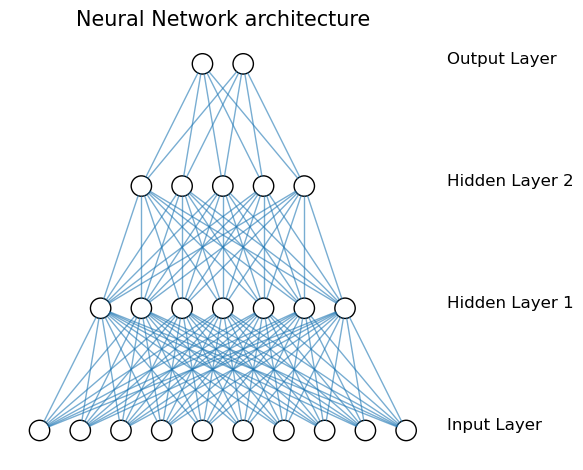

In [20]:
class Neuron():
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def draw(self, neuron_radius):
        circle = plt.Circle((self.x, self.y), radius=neuron_radius, fill=False)
        plt.gca().add_patch(circle)


class Layer():
    def __init__(self, network, number_of_neurons, number_of_neurons_in_widest_layer):
        self.vertical_distance_between_layers = 6
        self.horizontal_distance_between_neurons = 2
        self.neuron_radius = 0.5
        self.number_of_neurons_in_widest_layer = number_of_neurons_in_widest_layer
        self.previous_layer = self.__get_previous_layer(network)
        self.y = self.__calculate_layer_y_position()
        self.neurons = self.__intialise_neurons(number_of_neurons)

    def __intialise_neurons(self, number_of_neurons):
        neurons = []
        x = self.__calculate_left_margin_so_layer_is_centered(number_of_neurons)
        for iteration in range(number_of_neurons):
            neuron = Neuron(x, self.y)
            neurons.append(neuron)
            x += self.horizontal_distance_between_neurons
        return neurons

    def __calculate_left_margin_so_layer_is_centered(self, number_of_neurons):
        return self.horizontal_distance_between_neurons * (self.number_of_neurons_in_widest_layer - number_of_neurons) / 2

    def __calculate_layer_y_position(self):
        if self.previous_layer:
            return self.previous_layer.y + self.vertical_distance_between_layers
        else:
            return 0

    def __get_previous_layer(self, network):
        if len(network.layers) > 0:
            return network.layers[-1]
        else:
            return None

    def __line_between_two_neurons(self, neuron1, neuron2):
        angle = np.arctan((neuron2.x - neuron1.x) / float(neuron2.y - neuron1.y))
        x_adjustment = self.neuron_radius * np.sin(angle)
        y_adjustment = self.neuron_radius * np.cos(angle)
        line = plt.Line2D((neuron1.x - x_adjustment, neuron2.x + x_adjustment), (neuron1.y - y_adjustment, neuron2.y + y_adjustment),
                          alpha=0.6, lw=1)
        plt.gca().add_line(line)

    def draw(self, layerType=0):
        for neuron in self.neurons:
            neuron.draw(self.neuron_radius)
            if self.previous_layer:
                for previous_layer_neuron in self.previous_layer.neurons:
                    # conect neuron with each neuron from the previous layer
                    self.__line_between_two_neurons(neuron, previous_layer_neuron)
        # write Text
        x_text = self.number_of_neurons_in_widest_layer * self.horizontal_distance_between_neurons
        if layerType == 0:
            plt.text(x_text, self.y, 'Input Layer', fontsize = 12)
        elif layerType == -1:
            plt.text(x_text, self.y, 'Output Layer', fontsize = 12)
        else:
            plt.text(x_text, self.y, 'Hidden Layer '+str(layerType), fontsize = 12)


class NeuralNetwork():
    def __init__(self, number_of_neurons_in_widest_layer):
        self.number_of_neurons_in_widest_layer = number_of_neurons_in_widest_layer
        self.layers = []
        self.layertype = 0 # input layer

    def add_layer(self, number_of_neurons ):
        layer = Layer(self, number_of_neurons, self.number_of_neurons_in_widest_layer)
        self.layers.append(layer)

    def draw(self, save):
        plt.figure()
        for i in range(len(self.layers)):
            layer = self.layers[i]
            if i == len(self.layers)-1:
                i = -1 # mark the layer as an output layer
            layer.draw(i)
        plt.axis('scaled')
        plt.axis('off')
        plt.title( 'Neural Network architecture', fontsize=15 )
        plt.tight_layout()
        if save:
            plt.savefig('../../assets/images/neural_networks/neural_network_architecture.png', bbox_inches='tight')
        plt.show()


class DrawNN():
    def __init__(self, neural_network, save):
        self.neural_network = neural_network
        self.save = save

    def draw(self):
        widest_layer = max(self.neural_network)
        network = NeuralNetwork( widest_layer )
        for l in self.neural_network:
            network.add_layer(l)
        network.draw(self.save)
        
network = DrawNN([10,7,5,2], save=True)
network.draw()

## Perceptron

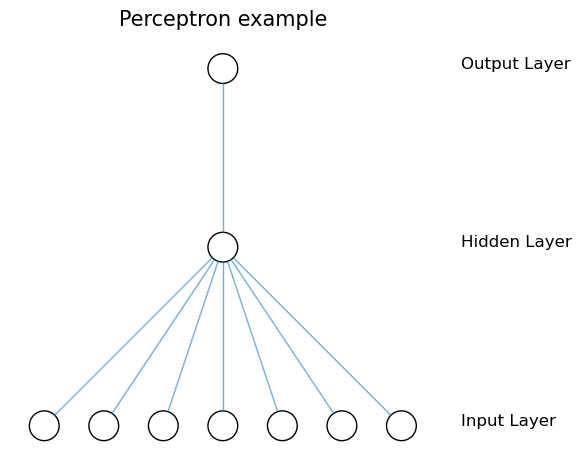

In [24]:
class Neuron():
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def draw(self, neuron_radius):
        circle = plt.Circle((self.x, self.y), radius=neuron_radius, fill=False)
        plt.gca().add_patch(circle)


class Layer():
    def __init__(self, network, number_of_neurons, number_of_neurons_in_widest_layer):
        self.vertical_distance_between_layers = 6
        self.horizontal_distance_between_neurons = 2
        self.neuron_radius = 0.5
        self.number_of_neurons_in_widest_layer = number_of_neurons_in_widest_layer
        self.previous_layer = self.__get_previous_layer(network)
        self.y = self.__calculate_layer_y_position()
        self.neurons = self.__intialise_neurons(number_of_neurons)

    def __intialise_neurons(self, number_of_neurons):
        neurons = []
        x = self.__calculate_left_margin_so_layer_is_centered(number_of_neurons)
        for iteration in range(number_of_neurons):
            neuron = Neuron(x, self.y)
            neurons.append(neuron)
            x += self.horizontal_distance_between_neurons
        return neurons

    def __calculate_left_margin_so_layer_is_centered(self, number_of_neurons):
        return self.horizontal_distance_between_neurons * (self.number_of_neurons_in_widest_layer - number_of_neurons) / 2

    def __calculate_layer_y_position(self):
        if self.previous_layer:
            return self.previous_layer.y + self.vertical_distance_between_layers
        else:
            return 0

    def __get_previous_layer(self, network):
        if len(network.layers) > 0:
            return network.layers[-1]
        else:
            return None

    def __line_between_two_neurons(self, neuron1, neuron2):
        angle = np.arctan((neuron2.x - neuron1.x) / float(neuron2.y - neuron1.y))
        x_adjustment = self.neuron_radius * np.sin(angle)
        y_adjustment = self.neuron_radius * np.cos(angle)
        line = plt.Line2D((neuron1.x - x_adjustment, neuron2.x + x_adjustment), (neuron1.y - y_adjustment, neuron2.y + y_adjustment),
                          alpha=0.6, lw=1)
        plt.gca().add_line(line)

    def draw(self, layerType=0):
        for neuron in self.neurons:
            neuron.draw(self.neuron_radius)
            if self.previous_layer:
                for previous_layer_neuron in self.previous_layer.neurons:
                    # conect neuron with each neuron from the previous layer
                    self.__line_between_two_neurons(neuron, previous_layer_neuron)
        # write Text
        x_text = self.number_of_neurons_in_widest_layer * self.horizontal_distance_between_neurons
        if layerType == 0:
            plt.text(x_text, self.y, 'Input Layer', fontsize = 12)
        elif layerType == -1:
            plt.text(x_text, self.y, 'Output Layer', fontsize = 12)
        else:
            plt.text(x_text, self.y, 'Hidden Layer', fontsize = 12)


class NeuralNetwork():
    def __init__(self, number_of_neurons_in_widest_layer):
        self.number_of_neurons_in_widest_layer = number_of_neurons_in_widest_layer
        self.layers = []
        self.layertype = 0 # input layer

    def add_layer(self, number_of_neurons ):
        layer = Layer(self, number_of_neurons, self.number_of_neurons_in_widest_layer)
        self.layers.append(layer)

    def draw(self, save):
        plt.figure()
        for i in range(len(self.layers)):
            layer = self.layers[i]
            if i == len(self.layers)-1:
                i = -1 # mark the layer as an output layer
            layer.draw(i)
        plt.axis('scaled')
        plt.axis('off')
        plt.title( 'Perceptron example', fontsize=15 )
        plt.tight_layout()
        if save:
            plt.savefig('../../assets/images/neural_networks/perceptron.png', bbox_inches='tight')
        plt.show()


class DrawNN():
    def __init__(self, neural_network, save):
        self.neural_network = neural_network
        self.save = save

    def draw(self):
        widest_layer = max(self.neural_network)
        network = NeuralNetwork( widest_layer )
        for l in self.neural_network:
            network.add_layer(l)
        network.draw(self.save)
        
network = DrawNN([7,1,1], save=True)
network.draw()

# Activation function effect

## Sigmoid and tanh

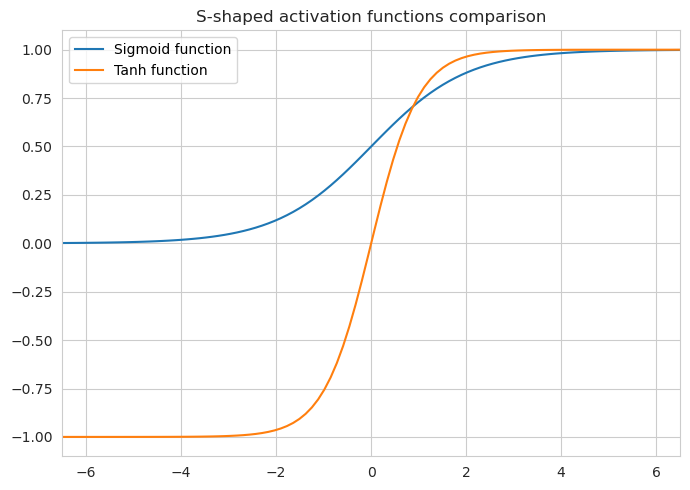

In [79]:
with sns.axes_style('whitegrid'):
    fig, ax = plt.subplots(figsize=(7, 5))

x = np.linspace(-6.5, 6.5, 100)

def sigmoid_f(x):
    return 1/(1+np.exp(-x))

def tanh_f(x):
    return 2/(1+np.exp(-2*x)) - 1

ax.plot(x, sigmoid_f(x), label='Sigmoid function')
ax.plot(x, tanh_f(x), label='Tanh function')

plt.legend()
ax.set_title('S-shaped activation functions comparison')

ax.set_xlim(-6.5, 6.5)
plt.tight_layout()
plt.savefig('../../assets/images/neural_networks/sigmoid_vs_tanh_example.png', bbox_inches='tight');

## ELU

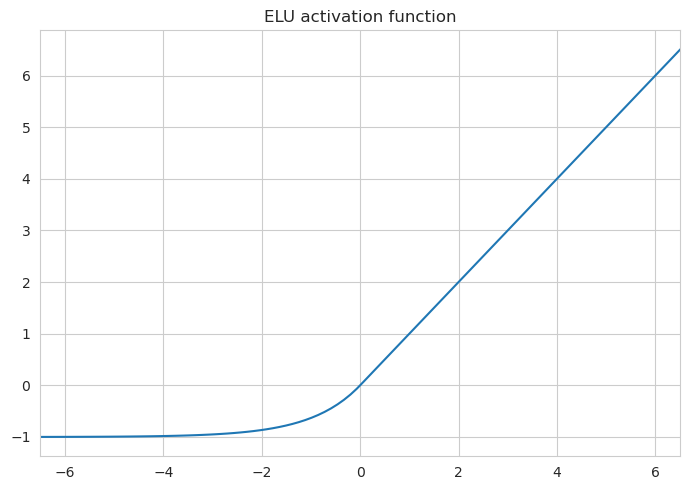

In [85]:
with sns.axes_style('whitegrid'):
    fig, ax = plt.subplots(figsize=(7, 5))

x = np.linspace(-6.5, 6.5, 100)

def elu_f(x):
    sigma = np.where(x>0, x, np.exp(x)-1)
    return sigma

ax.plot(x, elu_f(x))

ax.set_title('ELU activation function')

ax.set_xlim(-6.5, 6.5)
plt.tight_layout()
plt.savefig('../../assets/images/neural_networks/elu_example.png', bbox_inches='tight');

## ReLU

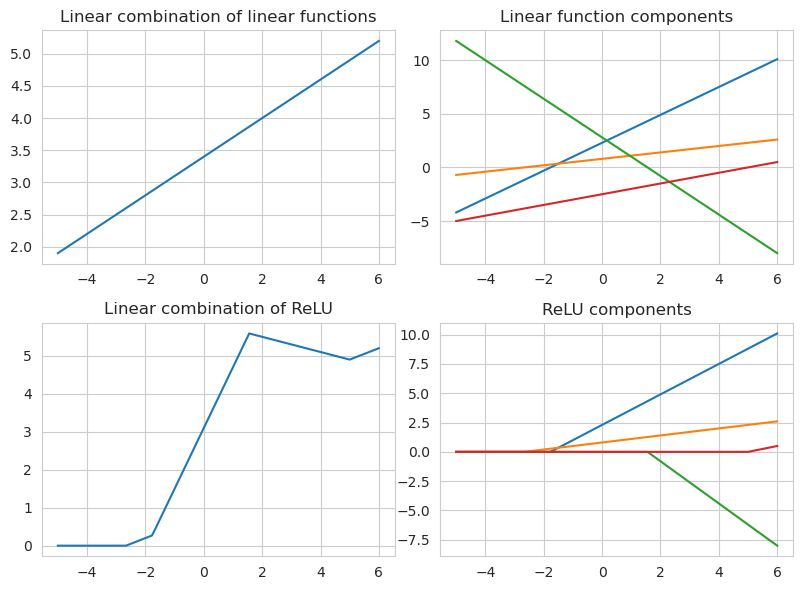

In [67]:
with sns.axes_style('whitegrid'):
    fig, ax = plt.subplots(2, 2, figsize=(8, 6))

x = np.linspace(-5, 6, 100)

def lin_func1(x, relu=False):
    y_transformed = 1.3*(x+1) + 1
    if relu:
        return np.maximum(np.full(x.shape, 0), y_transformed)
    else:
        return y_transformed
    
def lin_func2(x, relu=False):
    y_transformed = 0.3*(x+1) + 0.5
    if relu:
        return np.maximum(np.full(x.shape, 0), y_transformed)
    else:
        return y_transformed
    
def lin_func3(x, relu=False):
    y_transformed = 1.8*(x-1) - 1
    if relu:
        return -np.maximum(np.full(x.shape, 0), y_transformed)
    else:
        return -y_transformed
    
def lin_func4(x, relu=False):
    y_transformed = 0.5*(x-1) - 2
    if relu:
        return np.maximum(np.full(x.shape, 0), y_transformed)
    else:
        return y_transformed

ax[0][1].plot(x, lin_func1(x))
ax[0][1].plot(x, lin_func2(x))
ax[0][1].plot(x, lin_func3(x))
ax[0][1].plot(x, lin_func4(x))
ax[0][1].set_title('Linear function components')

ax[0][0].plot(x, lin_func1(x)+lin_func2(x)+lin_func3(x)+lin_func4(x))
ax[0][0].set_title('Linear combination of linear functions')

ax[1][1].plot(x, lin_func1(x, relu=True))
ax[1][1].plot(x, lin_func2(x, relu=True))
ax[1][1].plot(x, lin_func3(x, relu=True))
ax[1][1].plot(x, lin_func4(x, relu=True))
ax[1][1].set_title('ReLU components')

ax[1][0].plot(x, lin_func1(x, relu=True)+lin_func2(x, relu=True)+lin_func3(x, relu=True)+lin_func4(x, relu=True))
ax[1][0].set_title('Linear combination of ReLU')

plt.tight_layout()
plt.savefig('../../assets/images/neural_networks/ReLU_components_example.png', bbox_inches='tight')

In [36]:
np.full(x.shape, 0)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [38]:
x

array([-5.        , -4.88888889, -4.77777778, -4.66666667, -4.55555556,
       -4.44444444, -4.33333333, -4.22222222, -4.11111111, -4.        ,
       -3.88888889, -3.77777778, -3.66666667, -3.55555556, -3.44444444,
       -3.33333333, -3.22222222, -3.11111111, -3.        , -2.88888889,
       -2.77777778, -2.66666667, -2.55555556, -2.44444444, -2.33333333,
       -2.22222222, -2.11111111, -2.        , -1.88888889, -1.77777778,
       -1.66666667, -1.55555556, -1.44444444, -1.33333333, -1.22222222,
       -1.11111111, -1.        , -0.88888889, -0.77777778, -0.66666667,
       -0.55555556, -0.44444444, -0.33333333, -0.22222222, -0.11111111,
        0.        ,  0.11111111,  0.22222222,  0.33333333,  0.44444444,
        0.55555556,  0.66666667,  0.77777778,  0.88888889,  1.        ,
        1.11111111,  1.22222222,  1.33333333,  1.44444444,  1.55555556,
        1.66666667,  1.77777778,  1.88888889,  2.        ,  2.11111111,
        2.22222222,  2.33333333,  2.44444444,  2.55555556,  2.66

In [39]:
np.max([1,2], [2, 1])

TypeError: 'list' object cannot be interpreted as an integer